In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

X_real = pd.read_json("../benchmark/data/real_data.json")
X_syn = pd.read_json("../data/synthesized/final_datasets/TabSyn.json")
col = "market_value"
color_real = "blue"
color_syn = "orange"

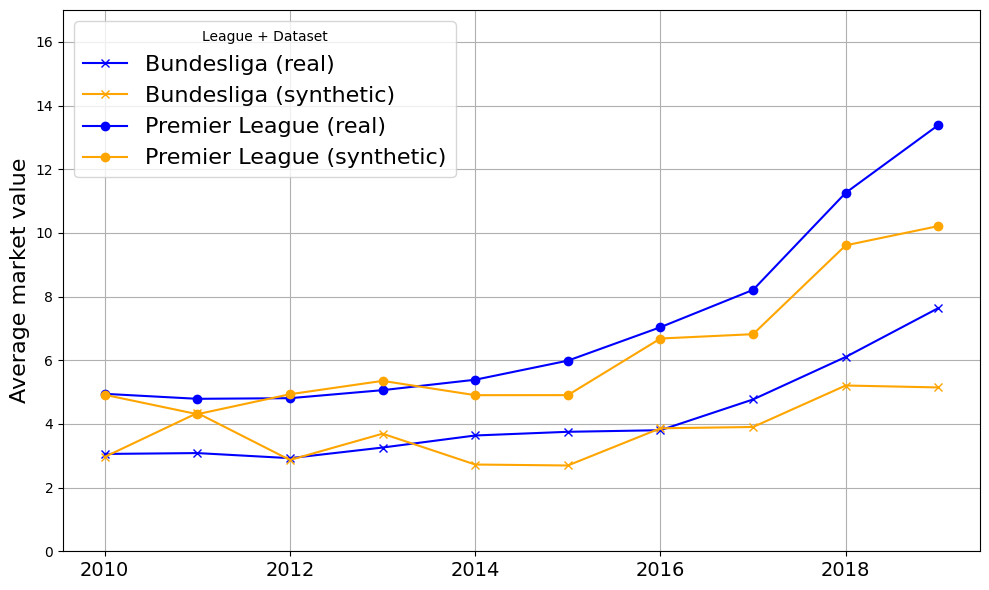

In [7]:
def _get_market_value_per_season(df: pd.DataFrame, origin: str):
    df_transfers = df[df["reason"].str.contains("regular interval")].copy()
    df_transfers["origin"] = origin
    grouped = df_transfers.groupby(["season_id", "league", "origin"])["market_value"].mean().reset_index()
    return grouped


real_grouped = _get_market_value_per_season(X_real, "real")
synthetic_grouped = _get_market_value_per_season(X_syn, "synthetic")

combined = pd.concat([real_grouped, synthetic_grouped])

colors = {"real": color_real, "synthetic": color_syn}
markers = {"Bundesliga": "x", "Premier League": "o", None: "-"}

fig = plt.figure(figsize=(10, 6))

for (league, origin), data in combined.groupby(["league", "origin"]):
    plt.plot(
        data["season_id"],
        data["market_value"],
        marker=markers.get(league, "o"),
        color=colors[origin],
        linestyle="-",
        label=f"{league} ({origin})"
    )

plt.ylim(0, 17)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=14)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

# plt.xlabel("Season", fontsize=18)
plt.ylabel("Average market value", fontsize=16)
# ax.annotate("Average Market Value Per Season by League and Dataset",
#             xy=(0.5, -0.15), xycoords='axes fraction', ha='center', va='top', fontsize=20)
plt.legend(title="League + Dataset", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("./saved/market_value_per_season_example.png")
plt.show()